### SBA Loan Project 

#### Josahn Oginga 

#### Stage 2

In [1]:
#import libraries 
import pandas as pd
import numpy as np 

In [2]:
#load the data 
df = pd.read_csv(r"C:\Users\Ochieng' Oginga\Documents\Post_S\Spring_2025\Data_Science_II\Project\Data\Oginga_Stage1.csv")
#show head 
df.head()

C:\Users\Ochieng' Oginga\AppData\Local\Temp\ipykernel_39968\2981810954.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Ochieng' Oginga\Documents\Post_S\Spring_2025\Data_Science_II\Project\Data\Oginga_Stage1.csv")


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


#### Preprocessing 

1. Handle Missing Values 

In [3]:
# Check if there are any missing values in the entire DataFrame
any_missing = df.isnull().values.any()

print("Any missing values in the DataFrame:", any_missing)


Any missing values in the DataFrame: True


Calculate the percentage of missing values per column to identify columns that need to be imputed or if the missing values are too low and won’t reduce the data’s richness and complexity. 

In [4]:
# Calculate the percentage of missing values per column
missing_percentage = (df.isnull().mean()) * 100

# Print the percentage of missing values
print(missing_percentage)


LoanNr_ChkDgt         0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.503579
LowDoc                0.287156
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64


Drop rows that have missing values on key variables that cannot be imputed. In this case, empty rows in these columns were dropped: Name, City, State, DisbursementDate, NewExist, Bank, BankState and MIS status. 

Since this is a large dataset and the variables are non-numeric, it is challenging to impute with a mean or median. 

In [5]:
# Drop rows where the 'Name',  "City", "State", "DisbursementDate", "MIS_Status" column has missing values (NaN)
df_clean = df.dropna(subset=['Name', "City", "State", "DisbursementDate", "MIS_Status", "NewExist", "BankState", "Bank"])

# Check new percentage of missing values per column
missing_percentage = (df_clean.isnull().mean()) * 100

# Print the percentage of missing values
print(missing_percentage)


LoanNr_ChkDgt         0.000000
Name                  0.000000
City                  0.000000
State                 0.000000
Zip                   0.000000
Bank                  0.000000
BankState             0.000000
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.000000
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.504762
LowDoc                0.284677
ChgOffDate           81.863937
DisbursementDate      0.000000
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.000000
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64


2. Binary Ecoding 

i. Convert charge off date from a date into a binary to handle the missing values: 0 – if there is no date, and 1 if there is a date, and store in ChgOffDate_binary column. 

In [6]:
#for charge off date 
# Use .loc to modify the original DataFrame and ensure you're creating the binary column
df_clean.loc[:, 'ChgOffDate_binary'] = df_clean['ChgOffDate'].notna().astype(int)

# Print the DataFrame to check the new column
print(df_clean[['ChgOffDate', 'ChgOffDate_binary']])


       ChgOffDate  ChgOffDate_binary
0             NaN                  0
1             NaN                  0
2             NaN                  0
3             NaN                  0
4             NaN                  0
...           ...                ...
899159        NaN                  0
899160        NaN                  0
899161        NaN                  0
899162   8-Mar-00                  1
899163        NaN                  0

[893292 rows x 2 columns]


C:\Users\Ochieng' Oginga\AppData\Local\Temp\ipykernel_39968\3815530800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'ChgOffDate_binary'] = df_clean['ChgOffDate'].notna().astype(int)


In [7]:
#check shape of data
df_clean.shape

(893292, 28)

ii. Remove undefined location in UrbanRural column, and using the new information, create UrbanRural_binary column, assign 0 to urban and 1 to rural. 

In [8]:
#first check how many datapoints are undefuined 
#Calculate the percentage of '0' (undefined) in the 'UrbanRural' column
undefined_percentage = (df_clean['UrbanRural'] == 0).mean() * 100

# Print the result
print(f"Percentage of undefined values in 'UrbanRural': {undefined_percentage:.2f}%")

# Drop rows where 'UrbanRural' is 0
df_clean = df_clean.drop(df_clean[df_clean['UrbanRural'] == 0].index)


Percentage of undefined values in 'UrbanRural': 35.93%


In [9]:
#create a binary column for UrbanRural for just urban and rural entries and create the 'UrbanRural_binary' column
df_clean.loc[:, 'UrbanRural_binary'] = df_clean['UrbanRural'].apply(lambda x: 0 if x == 1 else (1 if x == 2 else None))

# Print the DataFrame to check the new column
print(df_clean[['UrbanRural', 'UrbanRural_binary']].head(20))


     UrbanRural  UrbanRural_binary
12            1                  0
24            1                  0
28            1                  0
30            1                  0
32            1                  0
34            2                  1
38            1                  0
49            1                  0
58            1                  0
62            1                  0
65            1                  0
67            2                  1
71            1                  0
76            2                  1
77            1                  0
80            1                  0
83            1                  0
89            2                  1
123           1                  0
127           2                  1


In [10]:
df_clean.shape

(572333, 29)

iii. Convert MIS_Status into a binary category. 1 = PIF, and 0 = charged off 

In [11]:
#using MIS_status column, create a column MIS_Status_Binary with binary variable for paid in full = 1, and charged off = 0
df_clean['MIS_Status_Binary'] = df_clean['MIS_Status'].apply(lambda x: 1 if x == 'P I F' else 0)

3. Drop off non-key variables

Drop off columns that are not part of the key variables: 'LoanNr_ChkDgt', 'ChgOffDate','UrbanRural', 'RevLineCr', 'LowDoc', 'BalanceGross', 'MIS_Status'

In [12]:
# Drop the specified columns from the DataFrame
df_clean = df_clean.drop(columns=['LoanNr_ChkDgt', 'ChgOffDate','UrbanRural', 'RevLineCr', 'LowDoc', 'BalanceGross','MIS_Status'])

# Print the DataFrame to check the result
print(df_clean.head())

                           Name         City State    Zip  \
12                       CARVEL         APEX    NC  27502   
24                       SUBWAY  LITTLE ROCK    AR  72223   
28          WEYLAND CORPORATION    CAMARILLO    CA  93010   
30  CHICAGO BRICK UNLIMITED INC        MIAMI    FL  33186   
32                    RZI, INC.  NEW ORLEANS    LA  70130   

                              Bank BankState   NAICS ApprovalDate ApprovalFY  \
12           STEARNS BK NATL ASSOC        MN  445299     7-Feb-06       2006   
24                        HOPE FCU        MS  722211     7-Feb-06       2006   
28     WELLS FARGO BANK NATL ASSOC        SD  611110     7-Feb-06       2006   
30                  CITIBANK, N.A.        FL  238140     7-Feb-06       2006   
32  BUSINESS RES. CAP. SPECIALTY B        LA  532490     7-Feb-06       2006   

    Term  ...  RetainedJob  FranchiseCode  DisbursementDate  \
12   162  ...            0          15100         31-Mar-06   
24   126  ...            0

In [13]:
#see the final pre-processed dataset
df_clean.shape

(572333, 23)

4. Convert monetary values into numeric values  

In [14]:
# List of monetary columns
dollar_columns = ['DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Remove $ and , then convert to float
df_clean[dollar_columns] = df_clean[dollar_columns].replace('[\$,]', '', regex=True).astype(float)


Save processed data into data folder 

In [15]:
#save the clean dataframe to data folder
df_clean.to_csv(r"C:\Users\Ochieng' Oginga\Documents\Post_S\Spring_2025\Data_Science_II\Project\Data\Oginga_Stage2.csv", index=False)

### Descriptives 

i. Numeric descriptive statistics

In [16]:
#get description of the data 
df_clean.describe(include='all')


,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,RetainedJob,FranchiseCode,DisbursementDate,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffDate_binary,UrbanRural_binary,MIS_Status_Binary
count,572333,572333,572333,572333.000000,572333,572333,572333.000000,572333,572333.0,572333.000000,...,572333.000000,572333.000000,572333,5.723330e+05,5.723330e+05,5.723330e+05,5.723330e+05,572333.000000,572333.000000,572333.000000
unique,503960,26389,51,NaN,4599,55,NaN,4907,25.0,NaN,...,NaN,NaN,2851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SUBWAY,LOS ANGELES,CA,NaN,BANK OF AMERICA NATL ASSOC,CA,NaN,30-Jan-04,2006.0,NaN,...,NaN,NaN,31-Mar-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,937,8412,82707,NaN,68797,78333,NaN,981,75455.0,NaN,...,NaN,NaN,6938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,52526.476848,NaN,NaN,498976.917606,NaN,NaN,96.625847,...,5.958591,2718.594684,NaN,1.928716e+05,1.702337e+04,1.785447e+05,1.352192e+05,0.241809,0.183114,0.765161
std,NaN,NaN,NaN,31533.588428,NaN,NaN,195553.671067,NaN,NaN,70.744067,...,24.015743,12730.193422,NaN,3.094678e+05,7.365140e+04,3.027037e+05,2.487573e+05,0.428179,0.386760,0.423898
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,NaN,4.000000e+03,0.000000e+00,1.000000e+03,5.000000e+02,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,22480.000000,NaN,NaN,423210.000000,NaN,NaN,60.000000,...,0.000000,0.000000,NaN,3.500000e+04,0.000000e+00,2.500000e+04,1.300000e+04,0.000000,0.000000,1.000000
50%,NaN,NaN,NaN,54112.000000,NaN,NaN,511199.000000,NaN,NaN,84.000000,...,2.000000,1.000000,NaN,8.000000e+04,0.000000e+00,6.000000e+04,3.750000e+04,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,83713.000000,NaN,NaN,621340.000000,NaN,NaN,102.000000,...,6.000000,1.000000,NaN,2.000000e+05,0.000000e+00,1.800000e+05,1.275000e+05,0.000000,0.000000,1.000000


Summary of numeric variables 

In [17]:
#get summary of the numeric variables 
df_clean.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffDate_binary,UrbanRural_binary,MIS_Status_Binary
count,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,572333.000000,5.723330e+05,5.723330e+05,5.723330e+05,5.723330e+05,572333.000000,572333.000000,572333.000000
mean,52526.476848,498976.917606,96.625847,8.801560,1.285879,2.424426,5.958591,2718.594684,1.928716e+05,1.702337e+04,1.785447e+05,1.352192e+05,0.241809,0.183114,0.765161
std,31533.588428,195553.671067,70.744067,43.751445,0.453835,13.775755,24.015743,12730.193422,3.094678e+05,7.365140e+04,3.027037e+05,2.487573e+05,0.428179,0.386760,0.423898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000e+00,1.000000e+03,5.000000e+02,0.000000,0.000000,0.000000
25%,22480.000000,423210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.500000e+04,0.000000e+00,2.500000e+04,1.300000e+04,0.000000,0.000000,1.000000
50%,54112.000000,511199.000000,84.000000,4.000000,1.000000,0.000000,2.000000,1.000000,8.000000e+04,0.000000e+00,6.000000e+04,3.750000e+04,0.000000,0.000000,1.000000
75%,83713.000000,621340.000000,102.000000,8.000000,2.000000,2.000000,6.000000,1.000000,2.000000e+05,0.000000e+00,1.800000e+05,1.275000e+05,0.000000,0.000000,1.000000
max,99999.000000,928120.000000,569.000000,8000.000000,2.000000,5085.000000,9500.000000,92006.000000,1.144632e+07,2.223766e+06,5.472000e+06,5.472000e+06,1.000000,1.000000,1.000000


Summary for categorical variables 

In [18]:
#summary of categorical variables 
df_clean.describe(include=[object])


,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,DisbursementDate
count,572333,572333,572333,572333,572333,572333,572333,572333
unique,503960,26389,51,4599,55,4907,25,2851
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,30-Jan-04,2006,31-Mar-06
freq,937,8412,82707,68797,78333,981,75455,6938


ii. Graphical descriptions

a) Histogram for numeric values 


array([[<Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'NAICS'}>,
        <Axes: title={'center': 'Term'}>,
        <Axes: title={'center': 'NoEmp'}>],
       [<Axes: title={'center': 'NewExist'}>,
        <Axes: title={'center': 'CreateJob'}>,
        <Axes: title={'center': 'RetainedJob'}>,
        <Axes: title={'center': 'FranchiseCode'}>],
       [<Axes: title={'center': 'DisbursementGross'}>,
        <Axes: title={'center': 'ChgOffPrinGr'}>,
        <Axes: title={'center': 'GrAppv'}>,
        <Axes: title={'center': 'SBA_Appv'}>],
       [<Axes: title={'center': 'ChgOffDate_binary'}>,
        <Axes: title={'center': 'UrbanRural_binary'}>,
        <Axes: title={'center': 'MIS_Status_Binary'}>, <Axes: >]],
      dtype=object)

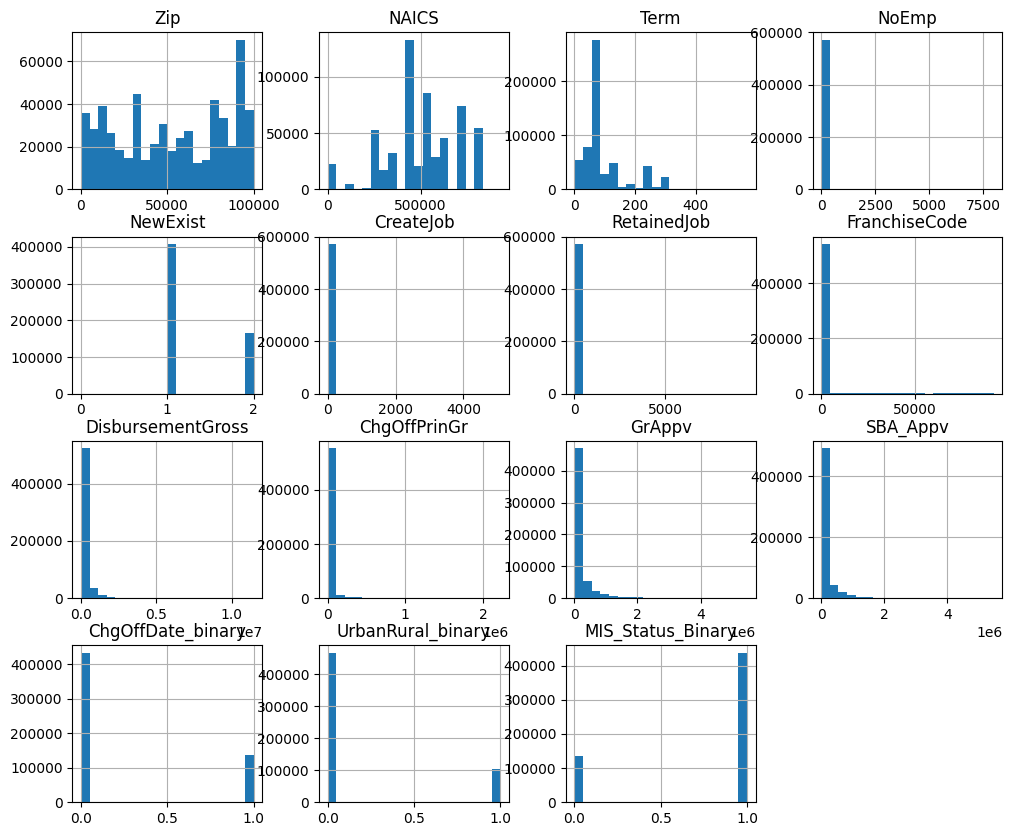

In [19]:
#create a histogram for bumeric variables with bins of 20 
df_clean.hist(figsize=(12, 10), bins=20)


ii. Historgram of Loan approval by year

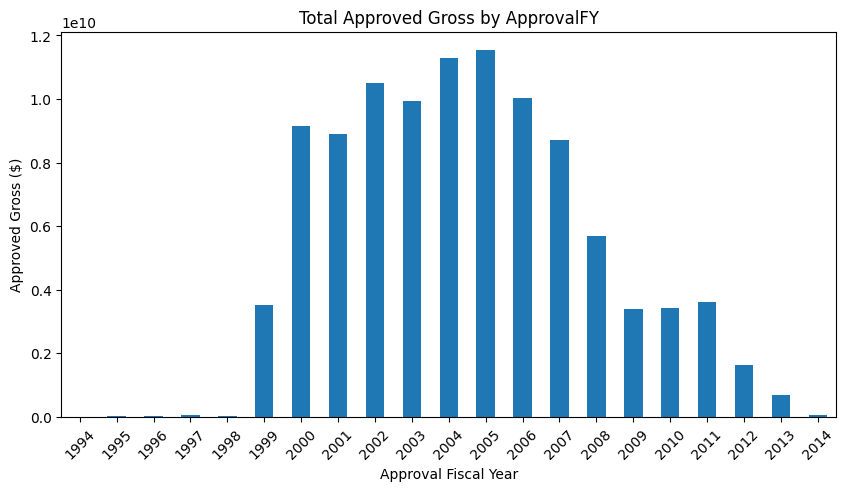

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

 # Ensure ApprovalFY is numeric
df_clean['ApprovalFY'] = pd.to_numeric(df_clean['ApprovalFY'], errors='coerce')

# Drop any NaN values that might have been introduced during conversion
df_clean = df_clean.dropna(subset=['ApprovalFY'])

# Aggregate and plot
df_clean.groupby('ApprovalFY')['GrAppv'].sum().plot(kind='bar', figsize=(10, 5))

plt.xlabel("Approval Fiscal Year")
plt.ylabel("Approved Gross ($)")
plt.title("Total Approved Gross by ApprovalFY")
plt.xticks(rotation=45)
plt.show()


The peak of loan approval was 2005

iii. Histogram of loan disbursement by year

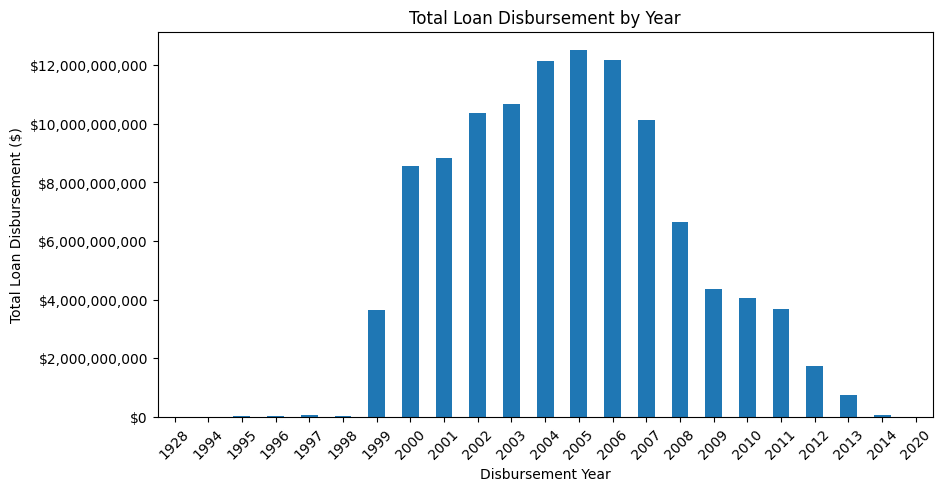

In [21]:

# Extract the last two digits (year) from DisbursementDate and convert to integer
df_clean['DisbursementYear'] = df_clean['DisbursementDate'].str[-2:].astype(int)

# Fix potential century issue: Convert 00-23 to 2000-2023, and 80-99 to 1980-1999
df_clean['DisbursementYear'] = df_clean['DisbursementYear'].apply(lambda x: x + 2000 if x < 24 else x + 1900)

# Aggregate total disbursement by year
yearly_disbursement = df_clean.groupby('DisbursementYear')['DisbursementGross'].sum()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
yearly_disbursement.plot(kind='bar', ax=ax)

# Formatting
ax.set_xlabel("Disbursement Year")
ax.set_ylabel("Total Loan Disbursement ($)")
ax.set_title("Total Loan Disbursement by Year")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format as dollars
plt.xticks(rotation=45)

plt.show()

The peak of loan disbursement year was 2005 matching the year that had the highest loan approval 

Box plots for outliers and distributions 

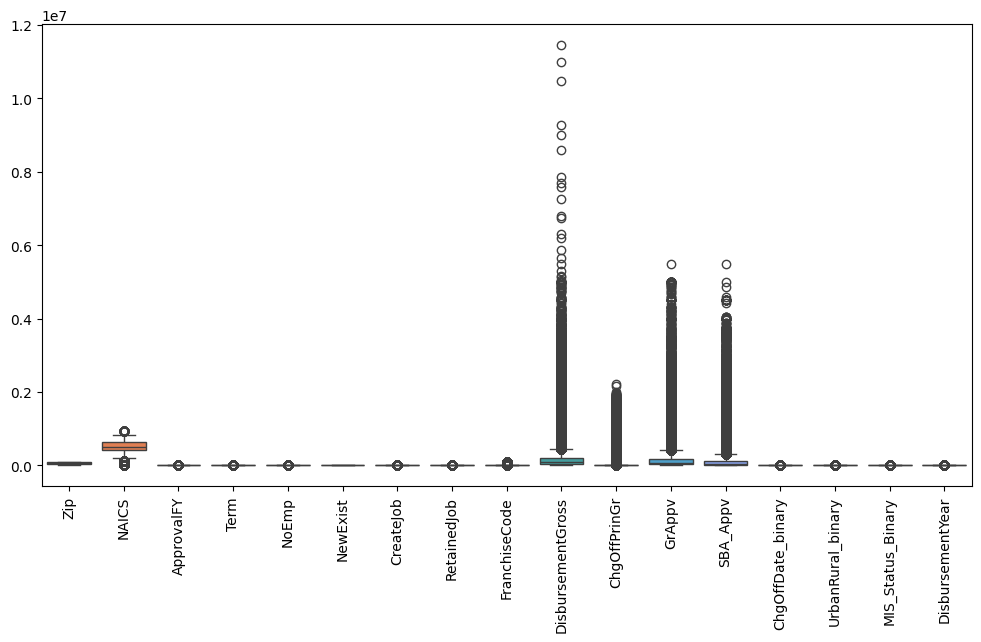

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()


Disbursement gross has a six outliers, GrAppc and SBA_appv only have 1 each

In [23]:
#check columns 
df_clean.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'DisbursementDate', 'DisbursementGross',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'ChgOffDate_binary',
       'UrbanRural_binary', 'MIS_Status_Binary', 'DisbursementYear'],
      dtype='object')

In [24]:
#split the data into training, test, and validation set 
from sklearn.model_selection import train_test_split

# MIS_Status_Binary' is the target column
X = df_clean.drop('MIS_Status_Binary', axis=1)  # Features
y = df_clean['MIS_Status_Binary']  # Target variable

# split the data into 80% train+validation and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# split the train+validation set into 87.5% train and 12.5% validation (to get 70% train and 10%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# print the shapes of the splits to verify
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 400632 samples
Validation set size: 57234 samples
Test set size: 114467 samples


### A. Predicting loan repayment status 

This section uses four models—Logistic Regression, Random Forest, XGBoost, and SVM—to predict whether a loan issued by banks and guaranteed by the SBA will be paid in full (1) or charged off (0). The target variable is MIS_Status_Binary, where 0 indicates a charged-off loan, and 1 indicates full repayment.

1. Logistic Regression as Baseline Model 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Define independent variables (features)
features = ['Term', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'NoEmp', 'NewExist',
            'CreateJob', 'RetainedJob', 'FranchiseCode', 'ChgOffPrinGr', 'ChgOffDate_binary',
            'ApprovalFY', 'UrbanRural_binary', 'DisbursementYear']

# Define target variable
X = df_clean[features]
y = df_clean['MIS_Status_Binary']

# Split data into 70% train, 10% validation, 20% test
#first get 20% to be test data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#then split the train data further to have validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Standardize the features (Logistic Regression performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = log_model.predict(X_train_scaled)
y_val_pred = log_model.predict(X_val_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}, Accuracy: {train_acc:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}, Accuracy: {val_acc:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}, Accuracy: {test_acc:.4f}")

Train MSE: 0.0070, R²: 0.9611, Accuracy: 0.9930
Validation MSE: 0.0071, R²: 0.9608, Accuracy: 0.9929
Test MSE: 0.0068, R²: 0.9618, Accuracy: 0.9932


2. Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Use unscaled X_train

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}, Accuracy: {train_acc:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}, Accuracy: {val_acc:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}, Accuracy: {test_acc:.4f}")


Train MSE: 0.0000, R²: 0.9999, Accuracy: 1.0000
Validation MSE: 0.0074, R²: 0.9589, Accuracy: 0.9926
Test MSE: 0.0069, R²: 0.9613, Accuracy: 0.9931


3. XG Boost 

In [27]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=50, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}, Accuracy: {train_acc:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}, Accuracy: {val_acc:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}, Accuracy: {test_acc:.4f}")


Train MSE: 0.0069, R²: 0.9614, Accuracy: 0.9931
Validation MSE: 0.0071, R²: 0.9608, Accuracy: 0.9929
Test MSE: 0.0069, R²: 0.9618, Accuracy: 0.9931


4. Support Machine Vectors 

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Train SVM model with scaled data
svm_model = SVC(kernel='linear',max_iter=500, random_state=42)
svm_model.fit(X_train_scaled, y_train)  # Use scaled X_train

# Predictions on scaled data
y_train_pred = svm_model.predict(X_train_scaled)
y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}, Accuracy: {train_acc:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}, Accuracy: {val_acc:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}, Accuracy: {test_acc:.4f}")

C:\Users\Ochieng' Oginga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train MSE: 0.2256, R²: -0.2556, Accuracy: 0.7744
Validation MSE: 0.2261, R²: -0.2541, Accuracy: 0.7739
Test MSE: 0.2249, R²: -0.2535, Accuracy: 0.7751


Out of the four models, SVM is the worst performer. It has a large MSE and a negative r-squared meaning that it is not the right model for this dataset. 

Logistic regression, Random Forest, and XGBoost all had small MSE, large r-squared, and accuracy clos to 100%. 

### B. Loan Default Prediction

Predicting loan defaults can help financial institutions assess risks before issuing loans.

1. Logistic regression 

In [30]:
# Define independent variables (features)
features = ['NoEmp', 'NewExist', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'UrbanRural_binary']

# Define target variable
X = df_clean[features]
y = df_clean['ChgOffDate_binary']

# Split data into 70% train, 10% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Standardize the features (Logistic Regression performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = log_model.predict(X_train_scaled)
y_val_pred = log_model.predict(X_val_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.7581
Validation Accuracy: 0.7569
Test Accuracy: 0.7586


2. Random Forest 

In [33]:
#import library 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Train Random Forest model using the already split data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Use unscaled X_train

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# Confusion Matrix
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.8883, Precision: 0.8791, Recall: 0.6236, F1: 0.7297
Validation Accuracy: 0.7409, Precision: 0.4460, Recall: 0.2736, F1: 0.3391
Test Accuracy: 0.7407, Precision: 0.4401, Recall: 0.2749, F1: 0.3384
Test Confusion Matrix:
[[77197  9658]
 [20022  7590]]


3. XGBoost 

In [32]:
#import library 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train XGBoost model (using already split data)
xgb_model = XGBClassifier(n_estimators=50, random_state=42, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# Confusion Matrix
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.7704, Precision: 0.6334, Recall: 0.1196, F1: 0.2012
Validation Accuracy: 0.7696, Precision: 0.6368, Recall: 0.1207, F1: 0.2029
Test Accuracy: 0.7703, Precision: 0.6246, Recall: 0.1198, F1: 0.2011
Test Confusion Matrix:
[[84866  1989]
 [24303  3309]]


### C. Predicting the Amount of Charged-Off Principal

Understanding what factors contribute to larger charge-offs can help refine lending policies.

1. Random Forest 

Train Accuracy: 0.8883, Precision: 0.8791, Recall: 0.6236, F1: 0.7297
Validation Accuracy: 0.7409, Precision: 0.4460, Recall: 0.2736, F1: 0.3391
Test Accuracy: 0.7407, Precision: 0.4401, Recall: 0.2749, F1: 0.3384

Test Confusion Matrix:


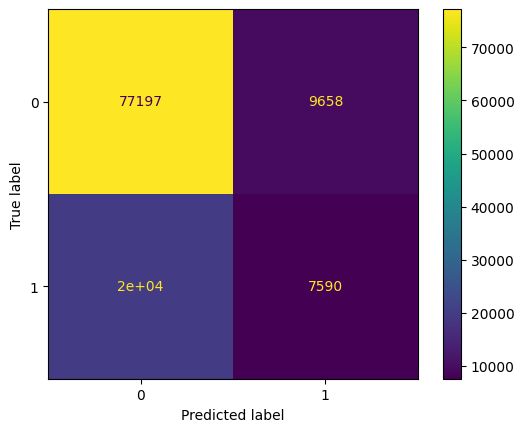

In [37]:
# Define features and target variable
features = ['NoEmp', 'NewExist', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'UrbanRural_binary']
X = df_clean[features]
y = df_clean['ChgOffDate_binary']

# Split data into 70% train, 10% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
val_precision = precision_score(y_val, y_val_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
val_recall = recall_score(y_val, y_val_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

# Confusion Matrix
print("\nTest Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

2. XG Boost

Use XGBoost Regressor because 'ChgOffDate_binary' is a continuous variable 

In [51]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train XGBoost model (regression)
xgb_model = XGBRegressor(n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")


Train MSE: 132.3159, R²: 0.1265
Validation MSE: 109.8631, R²: -0.1325
Test MSE: 365.5538, R²: 0.0125


### D. Job Creation Impact Prediction

This prediction can help  analyze which loans create the most jobs, aiding in economic policy decisions.

1. Random Forest 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Define features and target variable
features = ["DisbursementGross", "Term", "NewExist", "UrbanRural_binary"]
X = df_clean[features]
y = df_clean['CreateJob']  # Target variable changed to 'CreateJob'

# Split data into 70% train, 10% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)


# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# For multiclass classification, set the 'average' parameter to 'macro', 'micro', or 'weighted'
train_precision = precision_score(y_train, y_train_pred, average='macro')  # or 'micro' or 'weighted'
val_precision = precision_score(y_val, y_val_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')

train_recall = recall_score(y_train, y_train_pred, average='macro')
val_recall = recall_score(y_val, y_val_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

train_f1 = f1_score(y_train, y_train_pred, average='macro')
val_f1 = f1_score(y_val, y_val_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Print results
print(f"Train Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")


C:\Users\Ochieng' Oginga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ochieng' Oginga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ochieng' Oginga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages

Train Accuracy: 0.7369, Precision: 0.5947, Recall: 0.3789, F1: 0.4370
Validation Accuracy: 0.5170, Precision: 0.0137, Recall: 0.0116, F1: 0.0119
Test Accuracy: 0.5161, Precision: 0.0152, Recall: 0.0115, F1: 0.0124


2. XG Boost

Use XGRegressor because 'CreateJob' is a continuous variable.

In [45]:
# Convert target variable to integer type (if it's categorical)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Check unique classes in train and test sets
print(np.unique(y_train))
print(np.unique(y_test))

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   95   97   98   99
  100  101  102  103  105  106  108  110  112  115  116  118  119  120
  121  123  124  125  126  128  129  130  131  135  136  137  139  140
  141  143  144  145  148  149  150  152  153  154  155  160  164  165
  167  168  170  174  175  177  180  186  195  200  206  210  220  223
  225  226  235  250  280  300  310  320  350  360  363  375  400  409
  450  451  452  453  454  455  456  457  480  500  569  600  800 1000
 1011 1150 1618 2020 3100]
[   0    1    2    3    4    5    6    7    8    9

In [49]:
#make sure y is an integer
#import library 
from xgboost import XGBRegressor
# Train XGBoost model (regression)
xgb_model = XGBRegressor(n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train MSE: {train_mse:.4f}, R^2: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f}, R^2: {val_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R^2: {test_r2:.4f}")

Train MSE: 132.3159, R^2: 0.1265
Validation MSE: 109.8631, R^2: -0.1325
Test MSE: 365.5538, R^2: 0.0125
